In [ ]:
# Create a new DataFrame with the preprocessed data
preprocessed_data = pd.DataFrame({
    "Weather": X[:, 0],
    "Temperature": X[:, 1],
    "Precipitation": X[:, 2],
    "Event": X[:, 3],
    "Road_Type": X[:, 4],
    "Visibility": X[:, 5],
    "Wind_Speed": X[:, 6],
    "Holiday": X[:, 7],
    "AQI": X[:, 8],
    "Traffic_Jam": y  # Include the binary labels
})

# Save the preprocessed data to a CSV file
preprocessed_data.to_csv("preprocessed_data.csv", index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/sample_data/Dataset_csv.csv")  # Replace with your dataset file

# Data preprocessing
# Convert categorical columns to numerical using Label Encoding
label_encoders = {}
categorical_columns = ["Weather", "Event", "Road_Type", "Location"]

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Convert the "Temperature" column to numeric
data["Temperature"] = data["Temperature"].str.replace('°C', '').astype(float)

# Extract the numeric part of the "Precipitation" column
data["Precipitation"] = data["Precipitation"].str.replace(' mm', '').astype(float)

# Remove the units from "Visibility" and "Wind_Speed" columns and convert to float
data["Visibility"] = data["Visibility"].str.replace(' km', '').astype(float)
data["Wind_Speed"] = data["Wind_Speed"].str.replace(' km/h', '').astype(float)


# Split the data into features (X) and target (y)
X = data[["Weather", "Temperature", "Precipitation", "Event", "Road_Type", "Visibility", "Wind_Speed", "Holiday", "AQI"]]
y = data["Traffic_Jam"]

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)




# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and compile the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=64, input_shape=(X_train.shape[1], 1), activation='relu', return_sequences=True))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam')

# Train the LSTM model
model_lstm.fit(X_train, y_train, epochs=10, batch_size=64)

# Define and compile the GRU model
model_gru = Sequential()
model_gru.add(GRU(units=64, input_shape=(X_train.shape[1], 1), activation='relu', return_sequences=True))
model_gru.add(Dense(1, activation='sigmoid'))
model_gru.compile(loss='binary_crossentropy', optimizer='adam')

# Train the GRU model
model_gru.fit(X_train, y_train, epochs=10, batch_size=64)

# Make predictions on the test set
y_pred_lstm = model_lstm.predict(X_test)
y_pred_gru = model_gru.predict(X_test)




Epoch 1/10
1/1 [==============================] - 1s 744ms/step - loss: 0.6624 - accuracy: 0.6452
Epoch 2/10
1/1 [==============================] - 0s 20ms/step - loss: 0.6609 - accuracy: 0.6452
Epoch 3/10
1/1 [==============================] - 0s 29ms/step - loss: 0.6595 - accuracy: 0.6452
Epoch 4/10
1/1 [==============================] - 0s 24ms/step - loss: 0.6580 - accuracy: 0.6452
Epoch 5/10
1/1 [==============================] - 0s 22ms/step - loss: 0.6566 - accuracy: 0.6452
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6552 - accuracy: 0.6452
Epoch 7/10
1/1 [==============================] - 0s 14ms/step - loss: 0.6537 - accuracy: 0.6452
Epoch 8/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6523 - accuracy: 0.6452
Epoch 9/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6509 - accuracy: 0.6452
Epoch 10/10
1/1 [==============================] - 0s 80ms/step
Precision: 1.00
Recall: 0.33
F1 Score: 0.50
ROC AUC: 0.67


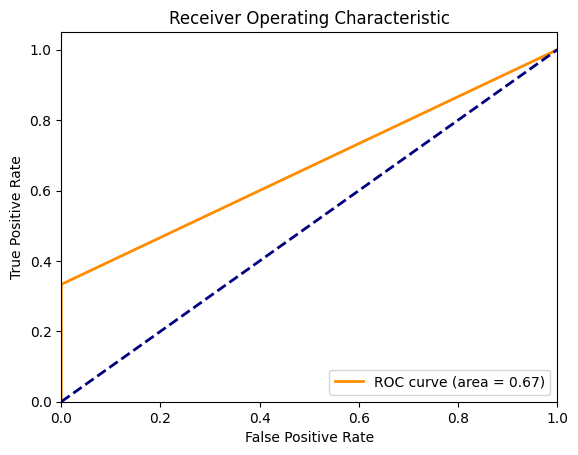

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

data = pd.read_csv('/content/preprocessed_data.csv')

X = data[['Weather', 'Temperature', 'Wind_Speed', 'AQI']].values
y = data['Traffic_Jam']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()

model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate precision, recall, F1 score
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Calculate ROC AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

print(f'ROC AUC: {roc_auc:.2f}')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.utils import to_categorical

data = pd.read_csv('/content/preprocessed_data.csv')

X = data[['Weather', 'Temperature', 'Wind_Speed','AQI']].values
y = data['Traffic_Jam']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()

model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)

accuracy = model.evaluate(X_test, y_test)


print(f'Accuracy: {accuracy[1]:.1f}')


Epoch 1/10
1/1 [==============================] - 0s 447ms/step - loss: 0.8761 - accuracy: 0.4194
Epoch 2/10
1/1 [==============================] - 0s 12ms/step - loss: 0.8746 - accuracy: 0.4194
Epoch 3/10
1/1 [==============================] - 0s 15ms/step - loss: 0.8732 - accuracy: 0.4194
Epoch 4/10
1/1 [==============================] - 0s 14ms/step - loss: 0.8718 - accuracy: 0.4194
Epoch 5/10
1/1 [==============================] - 0s 14ms/step - loss: 0.8704 - accuracy: 0.4194
Epoch 6/10
1/1 [==============================] - 0s 16ms/step - loss: 0.8690 - accuracy: 0.4194
Epoch 7/10
1/1 [==============================] - 0s 13ms/step - loss: 0.8676 - accuracy: 0.4194
Epoch 8/10
1/1 [==============================] - 0s 11ms/step - loss: 0.8662 - accuracy: 0.4194
Epoch 9/10
1/1 [==============================] - 0s 13ms/step - loss: 0.8648 - accuracy: 0.4194
Epoch 10/10
1/1 [==============================] - 0s 148ms/step - loss: 0.5691 - accuracy: 0.5000
Accuracy: 0.5


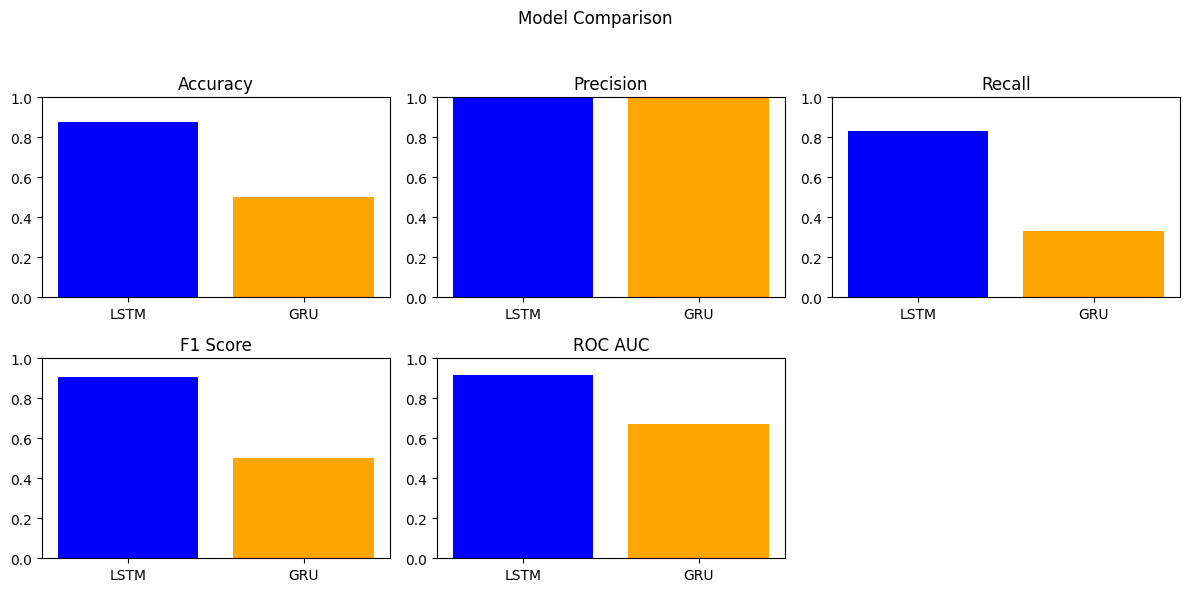

In [ ]:
import matplotlib.pyplot as plt

# Metrics for LSTM and GRU
models = ["LSTM", "GRU"]
accuracy = [0.875, 0.5]
precision = [1.0, 1.0]
recall = [0.83, 0.33]
f1_score = [0.9091, 0.5]
roc_auc = [0.9167, 0.67]

# Create subplots for each metric
fig, axs = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle("Model Comparison")

# Accuracy
axs[0, 0].bar(models, accuracy, color=['blue', 'orange'])
axs[0, 0].set_title("Accuracy")
axs[0, 0].set_ylim(0, 1)

# Precision
axs[0, 1].bar(models, precision, color=['blue', 'orange'])
axs[0, 1].set_title("Precision")
axs[0, 1].set_ylim(0, 1)

# Recall
axs[0, 2].bar(models, recall, color=['blue', 'orange'])
axs[0, 2].set_title("Recall")
axs[0, 2].set_ylim(0, 1)

# F1 Score
axs[1, 0].bar(models, f1_score, color=['blue', 'orange'])
axs[1, 0].set_title("F1 Score")
axs[1, 0].set_ylim(0, 1)

# ROC AUC
axs[1, 1].bar(models, roc_auc, color=['blue', 'orange'])
axs[1, 1].set_title("ROC AUC")
axs[1, 1].set_ylim(0, 1)

# Remove empty subplot
fig.delaxes(axs[1, 2])

# Adjust spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()
